In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import jieba


In [2]:
# 导入好评
hao = pd.read_csv('好评.txt',sep='\n')
hao.head()

,txt
0,外观挺好看?，特别漂亮的，拍照效果特别好，特别清晰，放大来拍也特别清晰。曲面的手感很好，充电...
1,老公非常满意，充电快，耗电慢，屏幕是曲面屏幕，看着很有画面感，手感也好，大小合适，不宽但是不...
2,超级闪超级闪的天空之境，连晚上都闪闪发光bulingbuling哦。本来交了另外一款的定金，...
3,信号超好，辐射低，通话声音清楚信号强弱可以通过数字显示来查看，这样就更加清楚明了，手机运行速...
4,手机拿到很惊艳，外观大气，「天空之境」很好看。拿在手里质感一流，做工精细，电池耐用，基本上可...


In [3]:
# 给好评设置评分为1
hao['score']=1
hao

,txt,score
0,外观挺好看?，特别漂亮的，拍照效果特别好，特别清晰，放大来拍也特别清晰。曲面的手感很好，充电...,1
1,老公非常满意，充电快，耗电慢，屏幕是曲面屏幕，看着很有画面感，手感也好，大小合适，不宽但是不...,1
2,超级闪超级闪的天空之境，连晚上都闪闪发光bulingbuling哦。本来交了另外一款的定金，...,1
3,信号超好，辐射低，通话声音清楚信号强弱可以通过数字显示来查看，这样就更加清楚明了，手机运行速...,1
4,手机拿到很惊艳，外观大气，「天空之境」很好看。拿在手里质感一流，做工精细，电池耐用，基本上可...,1
...,...,...
10713,刚到手，一个月后回来加评。目前总体来说，外观满分，手感满分。作为8年的果粉，直至今日，终于看...,1
10714,手机包装很好无破损，物流也快，手机外观漂亮，款式好看，质量很好，正品，做工精致，屏幕细腻够大...,1
10715,等这款手机很久了，京东的速度很赞。手机很棒，很惊艳，评测看了一堆，还是上手更真实。屏幕很棒很...,1
10716,近7年来用的是苹果手机，后来感觉苹果越来越不吸引了，直至华为mate30Pro4G的出现，就...,1


In [4]:
# 导入差评
huai = pd.read_csv('差评.txt',sep='\n')
huai

,txt
0,物流不错，手机一般
1,一星给京东 手机刚到手就减两百还12期免息
2,外形外观：外观出厂有问题 解决复杂
3,降价降的很好 我**原价买的
4,自己看吧 这包装
...,...
4065,垃圾 上不了Chrome
4066,京东这家店故意抬价，亲身经历，我朋友买的一样的手机6000块钱赠碎屏险还有无线充电宝，跟他们...
4067,给我的这个手机探针有明显划痕，二手机无疑，在找朋友查入网时间，晚点我再来评论
4068,不建议买华为，用不到一个月掉五百块，往出卖 赔三千 ，价格水分太大


In [5]:
huai['score']=0

In [6]:
huai

,txt,score
0,物流不错，手机一般,0
1,一星给京东 手机刚到手就减两百还12期免息,0
2,外形外观：外观出厂有问题 解决复杂,0
3,降价降的很好 我**原价买的,0
4,自己看吧 这包装,0
...,...,...
4065,垃圾 上不了Chrome,0
4066,京东这家店故意抬价，亲身经历，我朋友买的一样的手机6000块钱赠碎屏险还有无线充电宝，跟他们...,0
4067,给我的这个手机探针有明显划痕，二手机无疑，在找朋友查入网时间，晚点我再来评论,0
4068,不建议买华为，用不到一个月掉五百块，往出卖 赔三千 ，价格水分太大,0


In [7]:
# 把两个评论表合并在一起
pinglun = hao.append(huai)
pinglun

,txt,score
0,外观挺好看?，特别漂亮的，拍照效果特别好，特别清晰，放大来拍也特别清晰。曲面的手感很好，充电...,1
1,老公非常满意，充电快，耗电慢，屏幕是曲面屏幕，看着很有画面感，手感也好，大小合适，不宽但是不...,1
2,超级闪超级闪的天空之境，连晚上都闪闪发光bulingbuling哦。本来交了另外一款的定金，...,1
3,信号超好，辐射低，通话声音清楚信号强弱可以通过数字显示来查看，这样就更加清楚明了，手机运行速...,1
4,手机拿到很惊艳，外观大气，「天空之境」很好看。拿在手里质感一流，做工精细，电池耐用，基本上可...,1
...,...,...
4065,垃圾 上不了Chrome,0
4066,京东这家店故意抬价，亲身经历，我朋友买的一样的手机6000块钱赠碎屏险还有无线充电宝，跟他们...,0
4067,给我的这个手机探针有明显划痕，二手机无疑，在找朋友查入网时间，晚点我再来评论,0
4068,不建议买华为，用不到一个月掉五百块，往出卖 赔三千 ，价格水分太大,0


In [8]:
# 好评的数量
pinglun['score'].value_counts()

1    10718
0     4070
Name: score, dtype: int64

好评有10718条，差评有4070条

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


Text(0, 0.5, '评论数量')

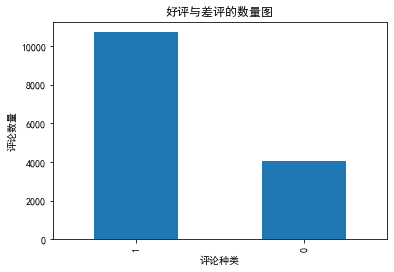

In [9]:
mpl.rcParams['font.sans-serif']=['SimHei'] 
pinglun['score'].value_counts().plot('bar')
plt.title('好评与差评的数量图')
plt.xlabel('评论种类')
plt.ylabel('评论数量')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  


Text(0, 0.5, '评论数量')

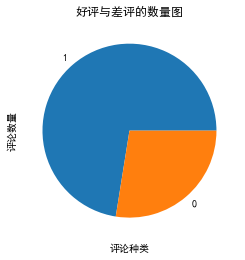

In [10]:
mpl.rcParams['font.sans-serif']=['SimHei'] 
pinglun['score'].value_counts().plot('pie')
plt.title('好评与差评的数量图')
plt.xlabel('评论种类')
plt.ylabel('评论数量')

In [11]:
# 保存到csv文件中
pinglun.to_csv('pingluns.csv')

In [12]:
pinglun = pd.read_csv('pinglun.csv')

In [13]:
pinglun['score'].count()

14788

In [14]:
# 使用结巴分词，对每一条评论进行分词操作
pinglun['comment'] = pinglun.txt.apply(lambda x: ' '.join(jieba.cut(x)))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.614 seconds.
Prefix dict has been built successfully.


In [15]:
pinglun.head()

,Unnamed: 0,txt,score,comment
0,0,外观挺好看?，特别漂亮的，拍照效果特别好，特别清晰，放大来拍也特别清晰。曲面的手感很好，充电...,1,外观 挺 好看 ? ， 特别 漂亮 的 ， 拍照 效果 特别 好 ， 特别 清晰 ， 放大 ...
1,1,老公非常满意，充电快，耗电慢，屏幕是曲面屏幕，看着很有画面感，手感也好，大小合适，不宽但是不...,1,老公 非常 满意 ， 充电 快 ， 耗电 慢 ， 屏幕 是 曲面 屏幕 ， 看着 很 有 画...
2,2,超级闪超级闪的天空之境，连晚上都闪闪发光bulingbuling哦。本来交了另外一款的定金，...,1,超级 闪 超级 闪 的 天空 之境 ， 连 晚上 都 闪闪发光 bulingbuling 哦...
3,3,信号超好，辐射低，通话声音清楚信号强弱可以通过数字显示来查看，这样就更加清楚明了，手机运行速...,1,信号 超好 ， 辐射 低 ， 通话 声音 清楚 信号 强弱 可以 通过 数字 显示 来 查看...
4,4,手机拿到很惊艳，外观大气，「天空之境」很好看。拿在手里质感一流，做工精细，电池耐用，基本上可...,1,手机 拿到 很 惊艳 ， 外观 大气 ， 「 天空 之境 」 很 好看 。 拿 在 手里 质...


In [16]:
# 删除掉不需要的列
df = pinglun[['comment','score']]

In [17]:
df.head()

,comment,score
0,外观 挺 好看 ? ， 特别 漂亮 的 ， 拍照 效果 特别 好 ， 特别 清晰 ， 放大 ...,1
1,老公 非常 满意 ， 充电 快 ， 耗电 慢 ， 屏幕 是 曲面 屏幕 ， 看着 很 有 画...,1
2,超级 闪 超级 闪 的 天空 之境 ， 连 晚上 都 闪闪发光 bulingbuling 哦...,1
3,信号 超好 ， 辐射 低 ， 通话 声音 清楚 信号 强弱 可以 通过 数字 显示 来 查看...,1
4,手机 拿到 很 惊艳 ， 外观 大气 ， 「 天空 之境 」 很 好看 。 拿 在 手里 质...,1


In [18]:
# 设置最大的长度，然后指定全局字典里面，一共保留多少个单词。我们设置为 10000 个
maxlen = 100
max_words = 10000

In [19]:
# 下面的几条语句，会自动帮助我们，把分词之后的评论信息，转换成为一系列的数字组成的序列
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.comment)
sequences = tokenizer.texts_to_sequences(df.comment)

In [20]:
# 看看转换后的数据类型
type(sequences)

list

In [21]:
# 看一下第一条的内容
sequences[:1]

[[16,
  86,
  49,
  1,
  51,
  67,
  2,
  1,
  9,
  15,
  51,
  10,
  1,
  51,
  48,
  1,
  429,
  134,
  82,
  13,
  51,
  48,
  4,
  97,
  2,
  54,
  6,
  10,
  1,
  59,
  31,
  1,
  615,
  414,
  1,
  21,
  74,
  277,
  29,
  83,
  110,
  184,
  797,
  4,
  2260,
  25,
  3169,
  2,
  1,
  14,
  205,
  13,
  51,
  10,
  1,
  6,
  33,
  54,
  1,
  161,
  6,
  570,
  2,
  8,
  51,
  179,
  1,
  120,
  13,
  336,
  1,
  714,
  5,
  423,
  1665,
  224,
  110,
  184,
  4]]

评论语句中的每一个记号，都被转换成为了一个大字典中对应的序号。字典的长度我们前面已经规定了，最多10000条。
我们探索一下，只看最前面5句话，包含多少个记号

In [22]:
for sequence in sequences[:5]:
    print(len(sequence))

79
51
81
52
98


In [23]:
# 使用pad_sequences方法使句子长短一致
data = pad_sequences(sequences, maxlen=maxlen)

In [24]:
data

array([[   0,    0,    0, ...,  110,  184,    4],
       [   0,    0,    0, ...,   19,   66,    8],
       [   0,    0,    0, ...,    1,  356,  353],
       ...,
       [   0,    0,    0, ...,  110,  134,  484],
       [   0,    0,    0, ..., 4223,   80,   81],
       [   0,    0,    0, ...,   52,  961,    4]])

In [25]:
# 长句子被裁剪 短句子前面补充了0
# 如果还希望知道，这些序号分别代表什么单词，就把这个字典保存下来
word_index = tokenizer.word_index

In [26]:
type(word_index)

dict

In [27]:
print(word_index)

{'，': 1, '的': 2, '：': 3, '。': 4, '了': 5, '很': 6, '手机': 7, '！': 8, '拍照': 9, '好': 10, '速度': 11, '是': 12, '也': 13, '屏幕': 14, '效果': 15, '外观': 16, '运行': 17, '华为': 18, '非常': 19, '我': 20, '用': 21, '就': 22, '外形': 23, '音效': 24, '都': 25, '买': 26, '待机时间': 27, '不': 28, '还': 29, '不错': 30, '快': 31, '其他': 32, '有': 33, '没有': 34, '可以': 35, '喜欢': 36, '京东': 37, '没': 38, '特色': 39, '在': 40, '感觉': 41, '说': 42, '给': 43, '流畅': 44, '真的': 45, '很快': 46, '还是': 47, '清晰': 48, '好看': 49, '支持': 50, '特别': 51, '这': 52, '就是': 53, '手感': 54, '使用': 55, '苹果': 56, '和': 57, '这个': 58, '充电': 59, '功能': 60, '5g': 61, '比': 62, '到': 63, '问题': 64, '降价': 65, '满意': 66, '漂亮': 67, '上': 68, '一个': 69, '屏': 70, '超级': 71, '颜色': 72, '一直': 73, '一天': 74, '吧': 75, '？': 76, '多': 77, '体验': 78, '才': 79, '太': 80, '大': 81, '拍': 82, '能': 83, '看': 84, '高': 85, '挺': 86, '收到': 87, '但是': 88, '电池': 89, '客服': 90, '现在': 91, '系统': 92, '等': 93, '很漂亮': 94, '500': 95, '物流': 96, '曲面': 97, '很棒': 98, '还有': 99, '要': 100, '棒': 101, '而且': 102, '强大': 103, '不是': 104, '之

In [28]:
# 把对应的情感标记，存储到标记序列 labels 中
labels = np.array(df.score)

In [29]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
# 划分训练集和测试集，把序号随机化，但保持数据和标记之间的一致性
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [31]:
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
#训练集占 80% ，验证集占 20%。根据总数，计算一下两者的实际个数
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [33]:
# 训练集和验证集的个数
training_samples

11830

In [34]:
validation_samples

2958

In [35]:
# 正式划分数据
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [36]:
X_train

array([[   0,    0,    0, ...,   50,   18,    1],
       [   0,    0,    0, ...,   33,   54,    4],
       [   0,    0,    0, ...,    3,   11,   46],
       ...,
       [   0,    0,    0, ...,  326,  339, 2251],
       [   0,    0,    0, ...,    3,    6,   49],
       [   0,    0,    0, ...,  114,  583,   55]])

In [37]:
# 安装 gensim 软件包，以便使用 Facebook 提供的 fasttext 词嵌入预训练模型
import gensim
from gensim.models import KeyedVectors

In [38]:
# 读入词嵌入预训练模型数据
zh_model = KeyedVectors.load_word2vec_format('zh.vec')

In [39]:
# 看看其中的第一个向量
zh_model.vectors[0]

array([ 8.6988e-02,  9.1123e-02,  3.0722e-02,  3.4160e-03,  2.7568e-02,
        5.4995e-03,  1.0905e-01,  4.9999e-02, -1.9161e-01,  4.2729e-02,
        1.3284e-01, -4.2997e-02,  4.4196e-02, -4.6042e-02,  5.2395e-02,
       -1.3002e-01,  1.1440e-01, -1.5359e-01,  5.7565e-02,  1.3344e-01,
       -6.4197e-02,  5.3679e-02,  1.3349e-01,  6.1268e-02, -2.4911e-03,
        1.9382e-01,  4.4253e-02, -2.0858e-02, -8.0714e-02,  1.0053e-01,
        5.8553e-02,  6.3155e-02, -2.9961e-02, -3.1906e-02,  5.6153e-02,
        5.1014e-02,  1.0752e-01, -7.4407e-02,  9.1990e-02,  1.7744e-01,
       -5.9959e-02,  1.4046e-01, -8.0201e-02,  4.3989e-02, -9.5205e-02,
        1.3022e-02,  9.1900e-02,  2.4317e-02, -7.0992e-02, -1.5179e-01,
       -3.0031e-02,  1.0344e-01, -5.8155e-02,  3.5950e-02, -5.5085e-02,
        4.7587e-02, -1.4251e-01, -1.3986e-01, -1.3891e-01,  6.9042e-03,
        9.0945e-02, -5.5156e-02,  6.8180e-02,  1.1948e-01,  7.8577e-03,
        1.0014e-01, -4.2805e-02,  2.2362e-01, -2.6212e-02, -3.53

In [40]:
# 看看前五个词汇
list(iter(zh_model.vocab))[:5]

['的', '</s>', '在', '是', '年']

In [41]:
# 一个向量中，包含多少个数字
len(zh_model[next(iter(zh_model.vocab))])

300

In [42]:
#把这个向量长度，进行保存
embedding_dim = len(zh_model[next(iter(zh_model.vocab))])

In [43]:
# 然后，以我们规定的字典最大长度，以及每个标记对应向量长度，建立一个随机矩阵
embedding_matrix = np.random.rand(max_words, embedding_dim)

In [44]:
embedding_matrix

array([[0.81177671, 0.35769904, 0.64477984, ..., 0.05282566, 0.16509018,
        0.48347073],
       [0.77008079, 0.26944009, 0.8750395 , ..., 0.46733951, 0.94532857,
        0.9895263 ],
       [0.60658867, 0.74351933, 0.17487181, ..., 0.36717793, 0.75967047,
        0.57370875],
       ...,
       [0.91938648, 0.56982513, 0.13483952, ..., 0.78135649, 0.95080846,
        0.32890666],
       [0.1254642 , 0.0935171 , 0.34268355, ..., 0.77315973, 0.91471807,
        0.94781083],
       [0.21833864, 0.38036555, 0.05218983, ..., 0.04036847, 0.648161  ,
        0.78828207]])

In [45]:
#矩阵进行一下数学转换
embedding_matrix = (embedding_matrix - 0.5) * 2
embedding_matrix

array([[ 0.62355341, -0.28460192,  0.28955968, ..., -0.89434868,
        -0.66981963, -0.03305853],
       [ 0.54016158, -0.46111982,  0.750079  , ..., -0.06532097,
         0.89065715,  0.9790526 ],
       [ 0.21317734,  0.48703867, -0.65025638, ..., -0.26564415,
         0.51934093,  0.1474175 ],
       ...,
       [ 0.83877296,  0.13965026, -0.73032096, ...,  0.56271298,
         0.90161691, -0.34218669],
       [-0.7490716 , -0.8129658 , -0.3146329 , ...,  0.54631946,
         0.82943615,  0.89562167],
       [-0.56332272, -0.2392689 , -0.89562034, ..., -0.91926306,
         0.296322  ,  0.57656414]])

In [46]:
# 尝试，对某个特定标记，读取预训练的向量结果
zh_model.get_vector('的')

array([ 8.6988e-02,  9.1123e-02,  3.0722e-02,  3.4160e-03,  2.7568e-02,
        5.4995e-03,  1.0905e-01,  4.9999e-02, -1.9161e-01,  4.2729e-02,
        1.3284e-01, -4.2997e-02,  4.4196e-02, -4.6042e-02,  5.2395e-02,
       -1.3002e-01,  1.1440e-01, -1.5359e-01,  5.7565e-02,  1.3344e-01,
       -6.4197e-02,  5.3679e-02,  1.3349e-01,  6.1268e-02, -2.4911e-03,
        1.9382e-01,  4.4253e-02, -2.0858e-02, -8.0714e-02,  1.0053e-01,
        5.8553e-02,  6.3155e-02, -2.9961e-02, -3.1906e-02,  5.6153e-02,
        5.1014e-02,  1.0752e-01, -7.4407e-02,  9.1990e-02,  1.7744e-01,
       -5.9959e-02,  1.4046e-01, -8.0201e-02,  4.3989e-02, -9.5205e-02,
        1.3022e-02,  9.1900e-02,  2.4317e-02, -7.0992e-02, -1.5179e-01,
       -3.0031e-02,  1.0344e-01, -5.8155e-02,  3.5950e-02, -5.5085e-02,
        4.7587e-02, -1.4251e-01, -1.3986e-01, -1.3891e-01,  6.9042e-03,
        9.0945e-02, -5.5156e-02,  6.8180e-02,  1.1948e-01,  7.8577e-03,
        1.0014e-01, -4.2805e-02,  2.2362e-01, -2.6212e-02, -3.53

In [47]:
# 判断一下，如果无法获得对应的词向量，我们就干脆跳过，使用默认的随机向量
for word, i in word_index.items():
    if i < max_words:
        try:
          embedding_vector = zh_model.get_vector(word)
          embedding_matrix[i] = embedding_vector
        except:
          pass

In [48]:
embedding_matrix

array([[ 0.62355341, -0.28460192,  0.28955968, ..., -0.89434868,
        -0.66981963, -0.03305853],
       [ 0.54016158, -0.46111982,  0.750079  , ..., -0.06532097,
         0.89065715,  0.9790526 ],
       [ 0.086988  ,  0.091123  ,  0.030722  , ...,  0.1095    ,
        -0.053695  ,  0.033823  ],
       ...,
       [ 0.16067   ,  0.042613  ,  0.063104  , ...,  0.0018621 ,
        -0.30768999,  0.25022   ],
       [ 0.15899   , -0.032987  ,  0.097759  , ...,  0.11637   ,
         0.23063   , -0.040541  ],
       [ 0.14001   , -0.037011  ,  0.071167  , ...,  0.27531001,
         0.22153001,  0.097541  ]])

至此，我们就开始搭建模型

In [49]:


units = 32

model = Sequential()
model.add(Embedding(max_words, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                42624     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 3,042,657
Trainable params: 3,042,657
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 把刚刚构建的词嵌入矩阵导入
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [51]:
# 开始训练
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel.h5")

Train on 11830 samples, validate on 2958 samples
Epoch 1/10
11830/11830 [==============================] - 14s 1ms/sample - loss: 0.3827 - acc: 0.8421 - val_loss: 0.3130 - val_acc: 0.8810
Epoch 2/10
11830/11830 [==============================] - 8s 656us/sample - loss: 0.2947 - acc: 0.8847 - val_loss: 0.3112 - val_acc: 0.8810
Epoch 3/10
11830/11830 [==============================] - 8s 651us/sample - loss: 0.2661 - acc: 0.8970 - val_loss: 0.2801 - val_acc: 0.8908
Epoch 4/10
11830/11830 [==============================] - 8s 669us/sample - loss: 0.2376 - acc: 0.9103 - val_loss: 0.3056 - val_acc: 0.8915s - lo
Epoch 5/10
11830/11830 [==============================] - 8s 654us/sample - loss: 0.2228 - acc: 0.9171 - val_loss: 0.3035 - val_acc: 0.8824
Epoch 6/10
11830/11830 [==============================] - 8s 648us/sample - loss: 0.2027 - acc: 0.9227 - val_loss: 0.3101 - val_acc: 0.8911
Epoch 7/10
11830/11830 [==============================] - 8s 645us/sample - loss: 0.1873 - acc: 0.9306 - v

查看数据训练过程中，损失与准确率的变化情况

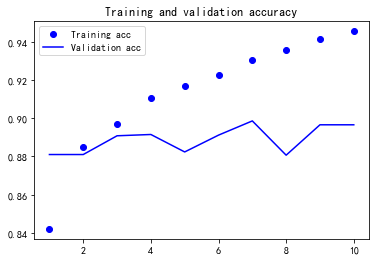

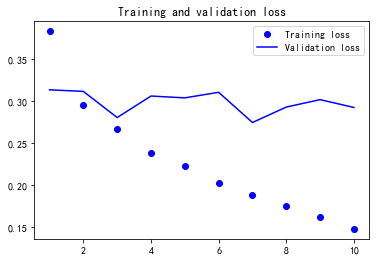

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

出现这种情况，表明模型出现过拟合的现象了，追其原因，是因为数据量太小